In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_excel('Zenith angle vs. coincident count rate.xlsx')

In [3]:
data

,Zenith angle,Avg. count per hour
0,0,11.4
1,9,11.5
2,19,10.1
3,28,8.8
4,34,8.3
5,40,7.7
6,45,5.8
7,53,5.6
8,66,3.1
9,70,3.0


In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

In [5]:
import scipy.optimize

### func1 = aCos(x)^n+b

In [6]:
def func1(x, a, n, b):
    return a*np.cos(np.deg2rad(X))**n + b

In [7]:
popt_func1, pcov_func1 = scipy.optimize.curve_fit(func1, X, y, p0=[1, 0, 0])

In [8]:
param = ['a','n','b']

In [9]:
for i in range(3):
    print ('Value for',param[i],' = ',popt_func1[i])

Value for a  =  9.338158293628565
Value for n  =  2.196544842507936
Value for b  =  2.060499473893638


In [10]:
perr = np.sqrt(np.diag(pcov_func1))
for i in range(3):
    print ('standard deviation error for',param[i],' = ',perr[i])

standard deviation error for a  =  0.33827630183132446
standard deviation error for n  =  0.21471318840975576
standard deviation error for b  =  0.2858942016107567


### Fitted curve to func 1

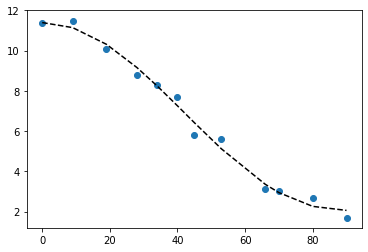

In [11]:
plt.scatter(X,y)
plt.plot(X,func1(X,*popt_func1),'k--')

In [12]:
def func2(x, a, b, n, k):
    return a*np.cos(np.deg2rad(X+k))**n + b

In [13]:
popt_func2, pcov_func2 = scipy.optimize.curve_fit(func2, X, y, p0=[1, 0, 0, -5])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [14]:
print('Value for k = ',popt_func2[-1])


Value for k =  -2.275585885558386e-06


In [18]:
from sklearn.metrics import r2_score
print('R^2 score :',r2_score(y,func1(X,*popt_func1)))

R^2 score : 0.9887736063413974
